<a href="https://colab.research.google.com/github/ajay152603/Python-for-DS/blob/master/4.%20Module%201%3A%20Data%20Science%20-%20Understaning%20visulization%20in%20detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Module 1: Data Science - Understaning visulization in detail

--------------------------------
**Plotting mathematical functions**


----------------------
*Statistical functions (scipy.stats)*

*   This module contains a large number of probability distributions as well as a growing library of statistical functions

*Mathematical functions (math)*


*   The math module is a standard module in Python and is always available. To use mathematical functions under this module, you have to import the module using 
-------------------







In [0]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import math as math



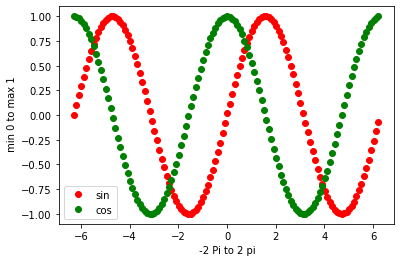

In [172]:
# Refer to the official documentation of packages 
# plot sign and cos graph in same plot

x = np.arange(-np.pi * 2,np.pi*2, 0.1)
y = np.sin(x)
plt.plot (x, y,'ro')  # we can also try go/bo/ro/r- etc for changing the representation of the points (marker)
plt.plot(x,np.cos(x),"go")
plt.legend(['sin', 'cos'])
plt.xlabel (" -2 Pi to 2 pi")
plt.ylabel (" min 0 to max 1")
plt.show()

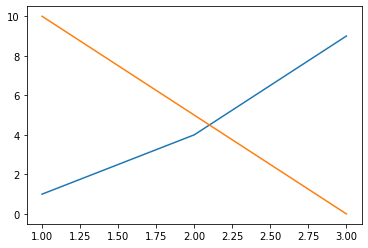

In [173]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 5, 0]
plt.plot(x, y)
plt.plot(x, z)

--------------------------------
Visualizing data by loading dataframes
------------------------------------------

In [0]:
df = pd.read_csv("/content/sample_data.csv")

In [175]:
#Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure
type(df)

pandas.core.frame.DataFrame

In [176]:
type (df.column_c)

pandas.core.series.Series

In [177]:
df

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [178]:
# extracting first element of the series 
df.column_c.iloc[0]


10

-----------------------
Visualizing data on the populations of countries
----------------------------------

In [179]:
countries = pd.read_csv("/content/countries.csv")
countries.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [180]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
countries.head(5)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [0]:
# Compare the population growth in the US and China

In [182]:
country =countries.drop(['year'], axis = 1)
country.head(4)

,country,population
0,Afghanistan,8425333
1,Afghanistan,9240934
2,Afghanistan,10267083
3,Afghanistan,11537966


In [183]:
 #Numerically comparing data 
x = country[(country.country ==  "United States") | (country.country == "China")]
x.count()
#
# df=pd.DataFrame ( countries, columns=("year",	"population"),
#  index= countries["country"])
# df.loc([['United States', 'China']])
x.groupby(['country']).sum() / 1000000 


,population
country,
China,11497.920623
United States,2738.534790


In [0]:
us = countries[countries.country == "United States"]

In [0]:
china =countries[countries.country == 'China']

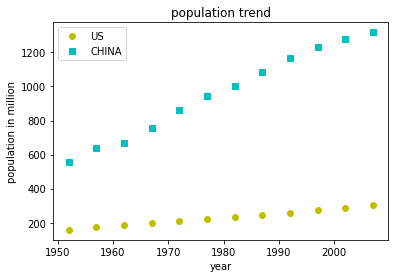

In [186]:
plt.plot (us.year,us.population/ 10**6, "oy")
plt.plot (china.year, china.population/10**6,'sc')
plt.xlabel("year")
plt.ylabel("population in million")
plt.legend ( ["US", "CHINA"])
plt.title("population trend")
plt.show()

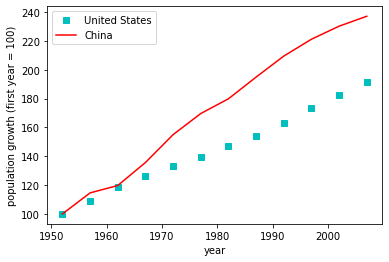

In [187]:
# Observe the population growth
plt.plot(us.year, (us.population / us.population.iloc[0] ) * 100, 'sc')
plt.plot(china.year, china.population / china.population.iloc[0] * 100,"r")
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

------------------------------
# Visualizing data on movies
---------------------------------

In [188]:
df = pd.read_csv("/content/moviesData.csv")
df.head(2)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy


In [189]:
df.shape

(600, 31)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1440x1440 with 0 Axes>

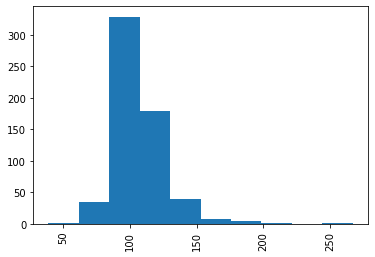

<Figure size 1440x1440 with 0 Axes>

In [190]:
# Plot a histogram of the object named runtime in movies.
# A histogram is a visual representation of the distribution of a dataset.
# It is used to plot the frequency of score occurrences in a continuous dataset. 
# Observe the warning in the output 
# Slide 9 

#df["runtime"].head(3)
plt.hist(df.runtime)
plt.xticks(rotation='vertical')
plt.figure(figsize=(20,20))

In [191]:
# observe that the count of runtime is one less than 600
df.shape
df["runtime"].describe()

count    599.000000
mean     105.884808
std       19.542042
min       39.000000
25%       93.000000
50%      102.000000
75%      115.000000
max      267.000000
Name: runtime, dtype: float64

In [192]:
print(df.runtime.isna().sum())

1


In [193]:
 # Drop the na datapoints 
 y = df["runtime"].dropna()
 y.shape


(599,)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  2.,  35., 329., 179.,  40.,   8.,   4.,   1.,   0.,   1.]),
 array([ 39. ,  61.8,  84.6, 107.4, 130.2, 153. , 175.8, 198.6, 221.4,
        244.2, 267. ]),
 <a list of 10 Patch objects>)

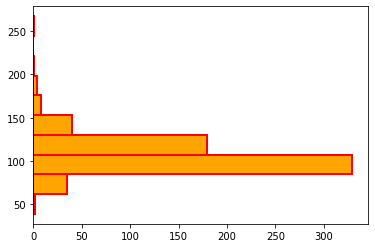

In [194]:
plt.hist(df.runtime, bins = 10 , orientation= 'horizontal', color ='orange',edgecolor='red', linewidth=2) 

In [195]:
df.head(5)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [0]:
df.genre.count()
category=df.genre.value_counts()


([<matplotlib.patches.Wedge at 0x7f7507161160>,
 [Text(-0.028794615684222712, 1.0996230581920325, 'Drama'),
  Text(-0.9611494790645294, -0.5349688578730392, 'Comedy'),
  Text(-0.2902604324465021, -1.0610131391061892, 'Action & Adventure'),
  Text(0.4102864993581735, -1.0206199040016883, 'Mystery & Suspense'),
  Text(0.9032640969357667, -0.6277849720938006, 'Documentary'),
  Text(1.0747501195193236, -0.23433348158809883, 'Horror'),
  Text(1.0987788597837946, -0.051817152490507265, 'Science Fiction & Fantasy')])

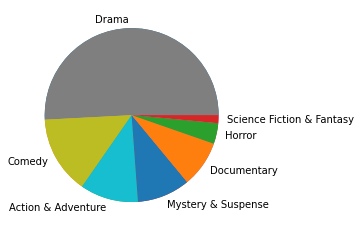

In [197]:
plt.pie(category)
plt.pie(category, labels=category.index.tolist())

In [198]:
df.head(4)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen


In [199]:
df[1:7:2]

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
5,6,Old Partner,Documentary,Documentary,78.0,Unrated,Shcalo Media Group,2009,1,15,2010.0,4.0,20.0,7.8,333,Fresh,91,Upright,86,no,no,no,no,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NaN,NaN


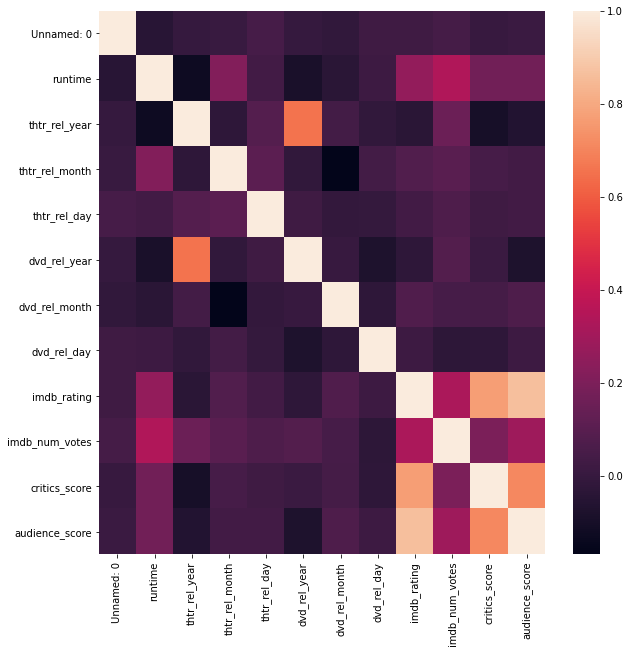

In [203]:
# heat plot for finding corelation
plt.figure(figsize=(10,10))
mask_frame = np.zeros_like(df.corr(), dtype= np.bool)
mask_frame[np.triu_indices_from(mask_frame)]= True
sns.heatmap(df.corr())

# vmin = -1, cmap='coolwarm', annot=True, mask_frame = mask_frame

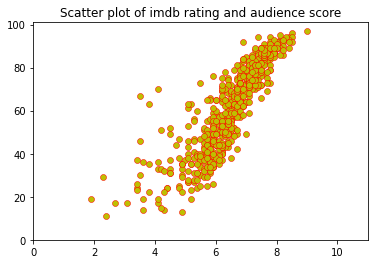

In [211]:
# imdb underscore rating and audience underscore score.
# draw a scatter plot with these two objects by using plot function.
# Scatter plot is a graph in which the values of two variables are plotted along two axes.
# The pattern of the resulting points reveals the correlation.
plt.scatter(df.imdb_rating, df.audience_score, c='y',edgecolor='red', linewidth=0.5)
# plt.scatter(movies.critics_score, movies.audience_score, c='red')
plt.xlim(0,11) # imdb varies from 0 to 10
plt.ylim(0,101) # audience varies from 0 to 100
plt.title('Scatter plot of imdb rating and audience score')
plt.show()
# Concept of correlation is needed here (intuition wise).
# Difference between auto-correlation (do not mix with correlation) 

[Text(0, 0, 'Drama'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Action & Adventure'),
 Text(0, 0, 'Mystery & Suspense'),
 Text(0, 0, 'Science Fiction & Fantasy')]

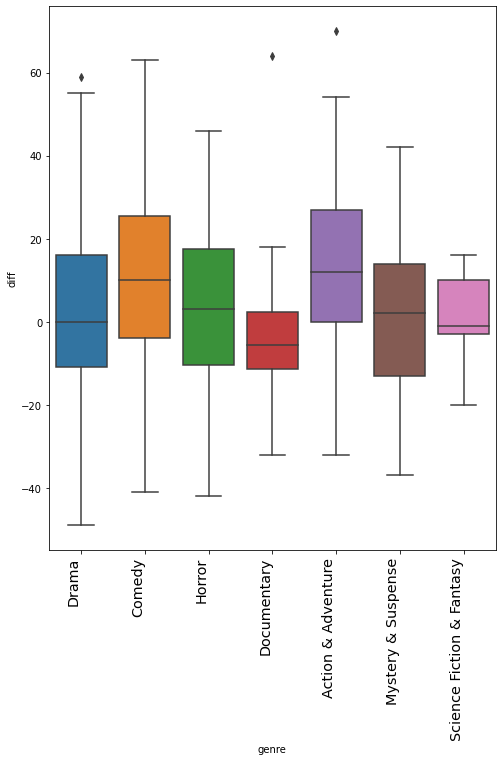

In [224]:
# Range, quartile, information in boxplot 
# 5 parameters of box plot : min , Q1 (first quartile), Q2 (median - arrange in sequence - then mid value), Q3 (third quartile), Max value, outliers
# wiskers  
# How to deal with outliers  : formula (Q3 + IQR) : (Q3- Q1) = Inter quartile Range
plt.figure(figsize=(8,10))
df['diff'] = df['audience_score'] - df['critics_score']
chart = sns.boxplot('genre', 'diff', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)